<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/decision_tree_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-success">
  Según distintos benchmarks (papers, kaggle.com) los **algoritmos de uso general** que tienen más veces la mejor performance son: **Gradient Boosted Trees, Random Forest y SVM**.
</div>

<img src="https://raw.githubusercontent.com/cris-her/machine-learning-platzi/master/img/benchmark_algs.png">

## Decision Trees

In [3]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)

In [4]:
from sklearn.model_selection import train_test_split

X = pd.read_csv('https://raw.githubusercontent.com/cris-her/datasets-platzi-course/master/intermediate_results/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [6]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
import graphviz

In [8]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file=None,
                         feature_names=X.columns)

In [9]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127832e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203546.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998769e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.1039811871593587e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924499e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.222648579874761e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

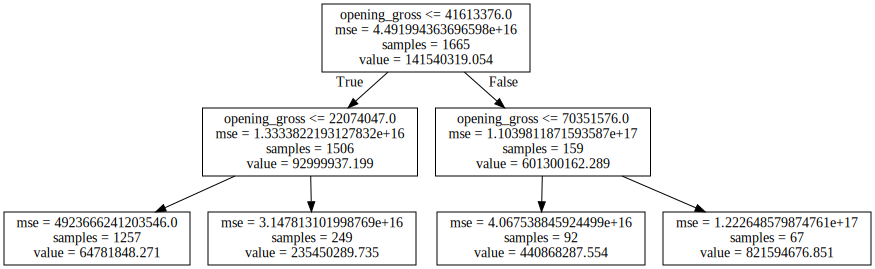

In [10]:
graphviz.Source(treedot)

Virtudes de los arboles de decision:

- Metodo poderoso y probado
- Interpretable
- No necesita escalar los datos (clasificación), y menos preprocesamiento de variables

Sin embargo en la practica existen modelos que obtienen mejor rendimiento. Como mejorar el modelo de arboles de decisión?